![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [30]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [31]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [32]:
penguins_df = pd.get_dummies(penguins_df)
scaler = StandardScaler()
penguins = scaler.fit_transform(penguins_df)

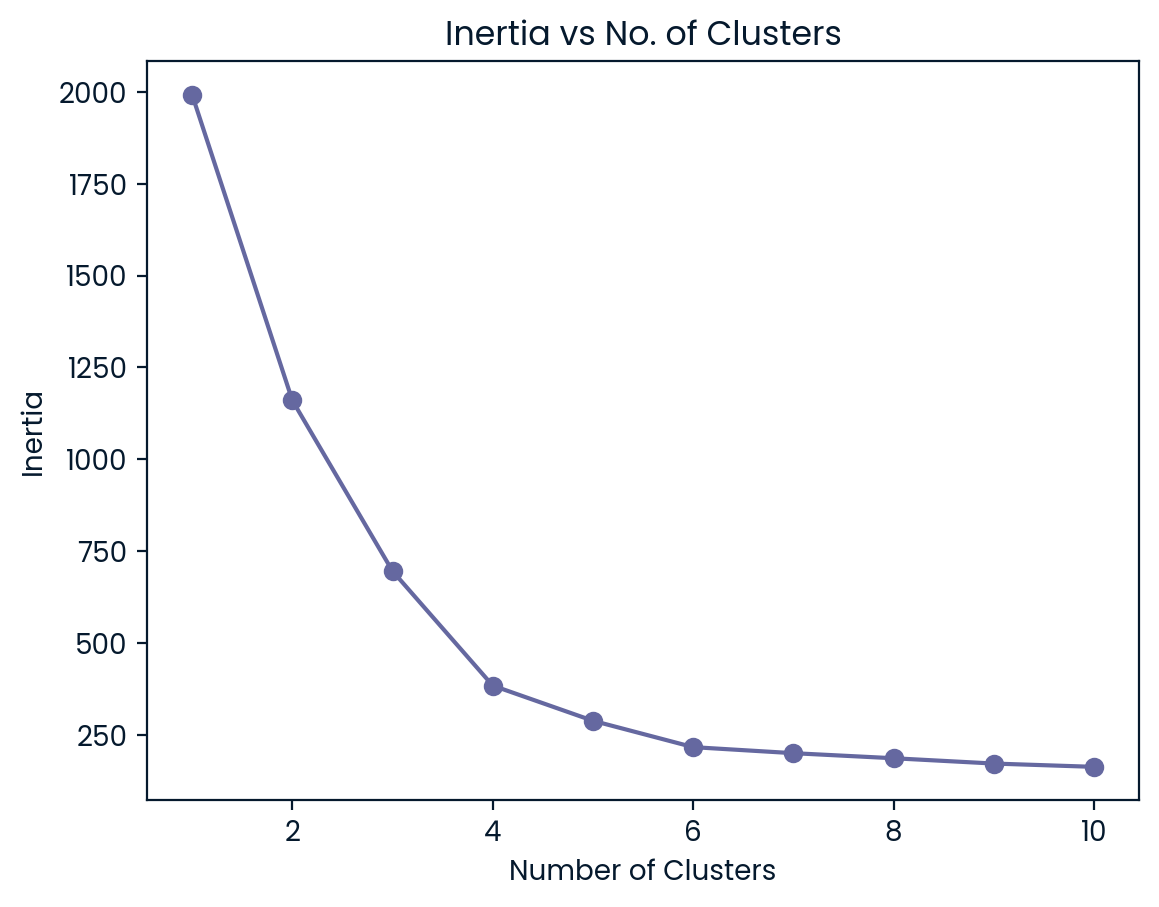

In [33]:
ks = range(1, 11)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(penguins)
    inertia = model.inertia_
    inertias.append(inertia)
plt.plot(ks, inertias, '-o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Inertia vs No. of Clusters")
plt.show()

In [34]:
model = KMeans(n_clusters=4)
model.fit(penguins)
labels = model.predict(penguins)

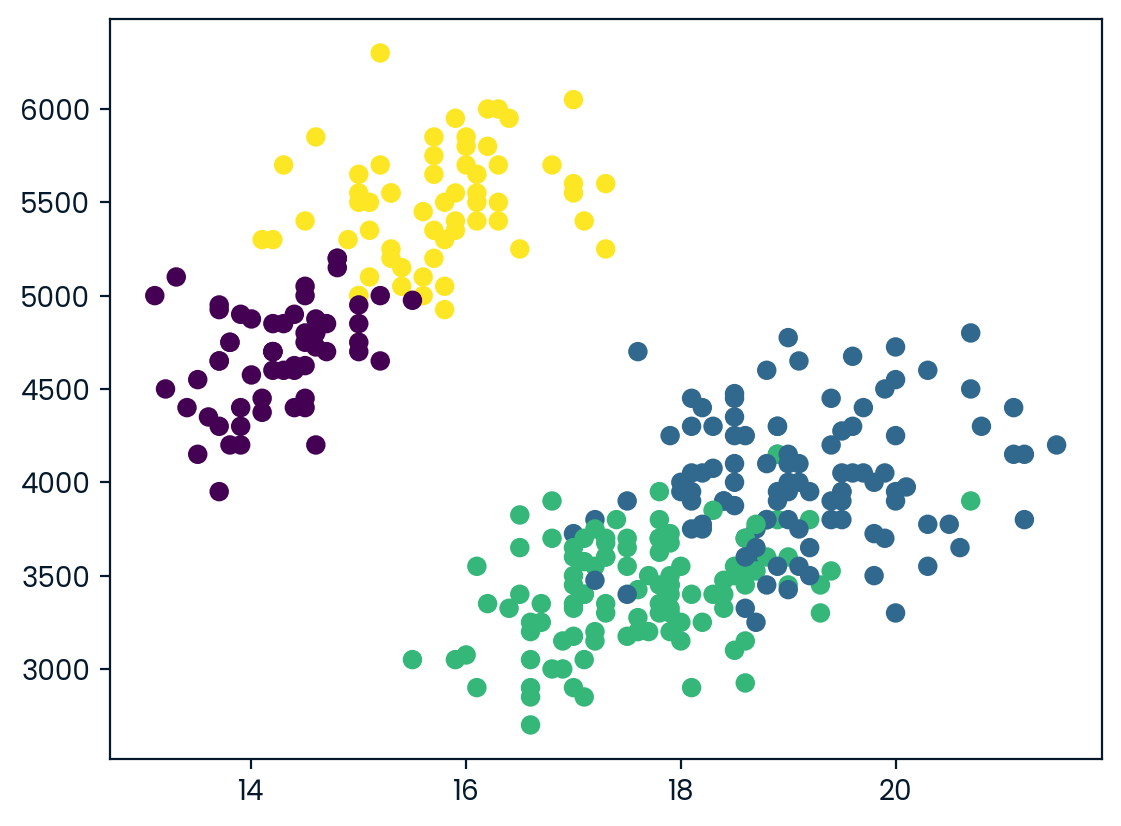

In [35]:
plt.scatter(data=penguins_df, x="culmen_depth_mm", y="body_mass_g", c=labels)
plt.show()

In [36]:
columns = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
penguins_d = pd.DataFrame(penguins_df[columns])
penguins_d["labels"] = labels
print(penguins_d.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  labels
0              39.1             18.7              181.0       3750.0       1
1              39.5             17.4              186.0       3800.0       2
2              40.3             18.0              195.0       3250.0       2
3              36.7             19.3              193.0       3450.0       2
4              39.3             20.6              190.0       3650.0       1


In [37]:
stat_penguins = penguins_d.groupby("labels").mean()
print(stat_penguins)

        culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
labels                                                                   
0              45.563793        14.237931         212.706897  4679.741379
1              43.878302        19.111321         194.764151  4006.603774
2              40.217757        17.611215         189.046729  3419.158879
3              49.473770        15.718033         221.540984  5484.836066
